In [1]:
import os
import sys; sys.path.insert(0, os.path.abspath("../"))
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# from utils.plots import get_image, get_image_and_plot
from tqdm import tqdm
import pandas as pd
from scipy.stats import skew, kurtosis
from skimage.measure import shannon_entropy
from pipeline.preprocessing import SkinLesionPreprocessing
from dataset.dataset import SegExamples
from pipeline.feature_extraction import FeaturesExtraction
from tqdm import tqdm
import pyarrow

In [2]:
examples = SegExamples()
preproc = SkinLesionPreprocessing()
cfe = FeaturesExtraction(levels=['global'])

In [5]:
cfe.features_names

['global_rgb_mean_1',
 'global_rgb_mean_2',
 'global_rgb_mean_3',
 'global_rgb_std_1',
 'global_rgb_std_2',
 'global_rgb_std_3',
 'global_rgb_skew_1',
 'global_rgb_skew_2',
 'global_rgb_skew_3',
 'global_rgb_kur_1',
 'global_rgb_kur_2',
 'global_rgb_kur_3',
 'global_rgb_ent_1',
 'global_rgb_ent_2',
 'global_rgb_ent_3',
 'global_lab_mean_1',
 'global_lab_mean_2',
 'global_lab_mean_3',
 'global_lab_std_1',
 'global_lab_std_2',
 'global_lab_std_3',
 'global_lab_skew_1',
 'global_lab_skew_2',
 'global_lab_skew_3',
 'global_lab_kur_1',
 'global_lab_kur_2',
 'global_lab_kur_3',
 'global_lab_ent_1',
 'global_lab_ent_2',
 'global_lab_ent_3',
 'global_ycrbcb_mean_1',
 'global_ycrbcb_mean_2',
 'global_ycrbcb_mean_3',
 'global_ycrbcb_std_1',
 'global_ycrbcb_std_2',
 'global_ycrbcb_std_3',
 'global_ycrbcb_skew_1',
 'global_ycrbcb_skew_2',
 'global_ycrbcb_skew_3',
 'global_ycrbcb_kur_1',
 'global_ycrbcb_kur_2',
 'global_ycrbcb_kur_3',
 'global_ycrbcb_ent_1',
 'global_ycrbcb_ent_2',
 'global_ycrbcb_

In [16]:
# get features example
all_feat = []
labels = []

for i in tqdm(range(examples.seg_examples_df.shape[0])): #

    if examples[i]['problem'] != 'binary':
        continue

    labels.append(examples[i]['label'])
    
    image = examples[i]['img']

    image = preproc.preprocess(image)

    all_feat.append(cfe.extract_features(image))

df = pd.DataFrame(all_feat, columns=cfe.features_names)

df['label'] = labels
df

100%|██████████| 68/68 [04:46<00:00,  4.22s/it]


,global_rgb_mean_1,global_rgb_mean_2,global_rgb_mean_3,global_rgb_std_1,global_rgb_std_2,global_rgb_std_3,global_rgb_skew_1,global_rgb_skew_2,global_rgb_skew_3,global_rgb_kur_1,...,global_hsv_skew_1,global_hsv_skew_2,global_hsv_skew_3,global_hsv_kur_1,global_hsv_kur_2,global_hsv_kur_3,global_hsv_ent_1,global_hsv_ent_2,global_hsv_ent_3,label
0,152.992170,123.149559,142.798076,40.043135,38.584645,41.395877,-2.392022,-2.102251,-2.117684,4.311303,...,-1.095011,2.158256,-2.390702,50.168866,3.527213,4.306696,4.140778,5.661916,5.600688,nevus
1,196.911162,192.009692,189.362591,12.391204,23.102795,32.842707,-0.445330,-1.600134,-1.292631,-0.095653,...,0.346451,1.339552,-1.150031,-1.309490,1.273946,1.501480,5.187313,6.194733,5.551783,nevus
2,147.916719,141.129257,144.851089,13.941590,19.386646,20.165094,-2.915427,-2.692110,-2.366494,9.456325,...,-0.975030,2.765314,-2.634956,-0.725161,7.987519,8.204843,5.598167,4.816990,5.249773,nevus
3,172.810968,84.565775,75.969115,17.384055,24.660250,27.145198,-0.474364,-0.417743,-0.281655,-0.591204,...,4.544777,0.372488,-0.474364,18.688960,-1.305041,-0.591204,2.648930,6.581112,6.039771,nevus
4,159.215983,129.968118,102.273428,18.382321,23.509017,28.501808,0.052440,0.615490,0.945260,-0.143208,...,13.098802,-0.374615,0.060085,191.199492,-0.094473,-0.130272,3.209923,6.957566,6.227345,nevus
5,180.455994,147.820603,117.509666,27.005446,39.598678,48.139017,-0.860739,-0.285280,0.322575,-0.153619,...,4.855361,-0.271052,-0.825030,24.337238,-0.446517,-0.148663,3.710621,7.309562,6.556792,nevus
6,184.139695,136.538368,141.271660,36.432731,33.366159,32.000824,-1.000762,0.131108,-0.284054,0.275424,...,-0.739143,0.142355,-0.910190,-1.398931,-0.324782,-0.008076,5.063493,6.528532,6.916258,nevus
7,162.069993,158.011627,158.577138,6.647272,12.449466,19.026712,-2.377956,-3.278097,-2.809574,9.441248,...,-0.101942,4.171330,-1.254648,-1.655704,19.789354,4.335424,5.561293,4.947659,4.902250,nevus
8,191.894553,165.072295,152.639307,24.468320,42.073039,49.499543,-1.651870,-0.926534,-0.577129,2.776631,...,2.172984,0.673637,-1.579304,3.279845,-0.478465,2.593065,5.093603,7.110408,6.315185,nevus
9,182.588024,166.808830,159.460874,23.382310,29.313145,41.229874,-1.319780,-0.344308,-0.251953,2.617177,...,0.494083,0.981698,-1.101114,-1.531721,-0.258795,2.071301,5.977143,6.555042,6.521770,nevus


In [21]:
df.to_feather('../data/binary/seg_examples_feat.f')


### Local features

In [13]:
cfe_l = FeaturesExtraction(levels=['global', 'local'])

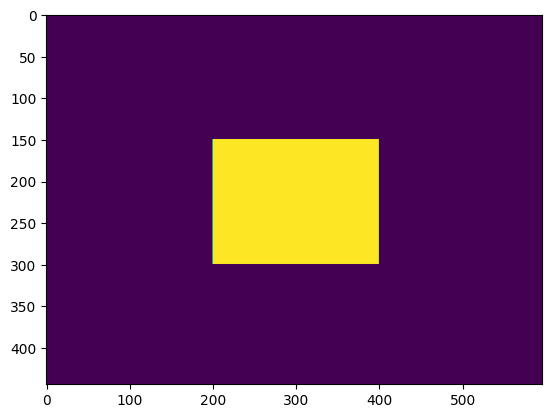

In [14]:
eximg = examples[0]['img']
eximg = preproc.preprocess(eximg)
mask = np.zeros(eximg.shape[:2])
mask[150:300,200:400] = 1
plt.imshow(mask)

In [15]:
results = cfe_l.extract_features(eximg, mask)

In [16]:
cfe_l.features_names

['global_rgb_mean_1',
 'global_rgb_mean_2',
 'global_rgb_mean_3',
 'global_rgb_std_1',
 'global_rgb_std_2',
 'global_rgb_std_3',
 'global_rgb_skew_1',
 'global_rgb_skew_2',
 'global_rgb_skew_3',
 'global_rgb_kur_1',
 'global_rgb_kur_2',
 'global_rgb_kur_3',
 'global_rgb_ent_1',
 'global_rgb_ent_2',
 'global_rgb_ent_3',
 'global_lab_mean_1',
 'global_lab_mean_2',
 'global_lab_mean_3',
 'global_lab_std_1',
 'global_lab_std_2',
 'global_lab_std_3',
 'global_lab_skew_1',
 'global_lab_skew_2',
 'global_lab_skew_3',
 'global_lab_kur_1',
 'global_lab_kur_2',
 'global_lab_kur_3',
 'global_lab_ent_1',
 'global_lab_ent_2',
 'global_lab_ent_3',
 'global_ycrbcb_mean_1',
 'global_ycrbcb_mean_2',
 'global_ycrbcb_mean_3',
 'global_ycrbcb_std_1',
 'global_ycrbcb_std_2',
 'global_ycrbcb_std_3',
 'global_ycrbcb_skew_1',
 'global_ycrbcb_skew_2',
 'global_ycrbcb_skew_3',
 'global_ycrbcb_kur_1',
 'global_ycrbcb_kur_2',
 'global_ycrbcb_kur_3',
 'global_ycrbcb_ent_1',
 'global_ycrbcb_ent_2',
 'global_ycrbcb_

In [17]:
results

[152.99216,
 123.14954,
 142.79808,
 40.043137,
 38.584644,
 41.395874,
 -2.3920210110772273,
 -2.1022494044014106,
 -2.1176841482676494,
 4.311297487788059,
 2.99116593975907,
 3.063140447608066,
 5.593805089478174,
 5.819141683528445,
 5.946027056430908,
 139.21397,
 143.0175,
 121.91823,
 41.786793,
 3.0324836,
 2.3932114,
 -2.2507767450073994,
 0.271861553835755,
 1.514732374436933,
 3.6215065749963147,
 2.0247052590979377,
 3.666464152624198,
 5.7347871462255,
 3.4439952694161082,
 2.9755901480405966,
 134.31432,
 141.35799,
 132.7455,
 39.20566,
 3.4016266,
 2.045807,
 -2.19566339734579,
 0.5259390308102352,
 -1.2462580082815111,
 3.3877678880328075,
 1.6976016348715532,
 2.8161429335575887,
 5.754950483895106,
 3.653975752306781,
 2.9039445090852456,
 159.47516,
 57.346497,
 153.01717,
 4.9109454,
 30.875774,
 40.02608,
 -1.094993545873534,
 2.1582560089925438,
 -2.3906992002758227,
 50.16883493133584,
 3.5272144816590227,
 4.306687746109292,
 4.140778003045017,
 5.6619155069085